# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# import dependencies
from citipy import citipy
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import requests
import json
import datetime as dt
from scipy.stats import linregress

from api_keys import weather_api_key



## Generate Cities List

In [2]:
# create lists for the latitudes and logitudes generated, and the cities returned
lat_lon = []        
cities = []


In [3]:
# Create random latitudes and logitudes to look up cities
lat = np.random.uniform(low=-90, high=90, size=1500)
lon = np.random.uniform(low=-180, high=180, size=1500)
lat_lon = zip(lat, lon)
lat_lon

In [4]:
# Create the city list
for lat_lon in lat_lon:

    # Nearest city to the generated lat_lon
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name

    # If unique, add to cities
    if city not in cities:
        cities.append(city)

# Check cities returned
# cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Create API url
url = 'http://api.openweathermap.org/data/2.5/weather?&units=metric'

In [6]:
# Counter for cities 
number = 1

# Create lists to hold data as called
city_name = []
lat = []
lon = []
temp = []
humidity = []
cloudiness = []
wind_sp = []



In [7]:
# Begin the api call
for city in cities:
    try:
        city_data = (requests.get(url + '&q=' + city +'&appid=' + weather_api_key)).json()
        city_name.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        lon.append(city_data['coord']['lon'])
        temp.append(city_data['main']['temp_max'])
        humidity.append(city_data['main']['humidity'])
        cloudiness.append(city_data['clouds']['all'])
        wind_sp.append(city_data['wind']['speed'])

        print(f'Processing record {number} of {len(cities)}. | {city}')

        number += 1


    except KeyError:
        print(f'City not found. Skipping {city}...')
        # number = number + 1


Processing record 1 of 614. | east london
Processing record 2 of 614. | cherskiy
Processing record 3 of 614. | vaini
Processing record 4 of 614. | flin flon
Processing record 5 of 614. | mataura
Processing record 6 of 614. | hilo
Processing record 7 of 614. | yar-sale
Processing record 8 of 614. | quartz hill
Processing record 9 of 614. | kapaa
Processing record 10 of 614. | rosetown
Processing record 11 of 614. | mpika
Processing record 12 of 614. | hermanus
Processing record 13 of 614. | hobyo
Processing record 14 of 614. | port elizabeth
Processing record 15 of 614. | bambous virieux
Processing record 16 of 614. | yellowknife
Processing record 17 of 614. | grindavik
Processing record 18 of 614. | roald
Processing record 19 of 614. | bluff
Processing record 20 of 614. | rikitea
Processing record 21 of 614. | faanui
Processing record 22 of 614. | tuscaloosa
Processing record 23 of 614. | berlevag
City not found. Skipping warqla...
Processing record 24 of 614. | butaritari
Processing r

In [8]:
#city_name

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
# Create dataframe
city_data_df = pd.DataFrame({'City': city_name,
                                'Latitude': lat,
                                'Longitude': lon, 
                                'Temperature': temp,
                                'Humidity': humidity,
                                'Cloudiness': cloudiness, 
                                'Wind Speed': wind_sp})

#pd.DataFrame.to_csv(city_data_df, 'city_data.csv')

city_data_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,East London,-33.0153,27.9116,23.00,73,0,4.12
1,Cherskiy,68.7500,161.3000,-6.41,88,100,1.80
2,Vaini,-21.2000,-175.2000,24.00,94,90,4.12
3,Flin Flon,54.7682,-101.8650,0.00,74,20,1.03
4,Mataura,-46.1927,168.8643,9.44,82,0,1.79
...,...,...,...,...,...,...,...
554,San Juan,-31.5375,-68.5364,10.86,48,10,2.60
555,Aran,40.6253,46.9756,16.00,88,90,5.14
556,Nishihara,26.1842,127.7558,23.00,94,75,4.63
557,Forsytheganj,52.6333,29.7333,18.24,49,100,5.62


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# Cities with humidity over 100%
above_100 = city_data_df[city_data_df.Humidity > 100].index
above_100

Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df = city_data_df
for x in above_100:
    clean_city_df = city_data_df.drop([x])

clean_city_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,East London,-33.0153,27.9116,23.00,73,0,4.12
1,Cherskiy,68.7500,161.3000,-6.41,88,100,1.80
2,Vaini,-21.2000,-175.2000,24.00,94,90,4.12
3,Flin Flon,54.7682,-101.8650,0.00,74,20,1.03
4,Mataura,-46.1927,168.8643,9.44,82,0,1.79
...,...,...,...,...,...,...,...
554,San Juan,-31.5375,-68.5364,10.86,48,10,2.60
555,Aran,40.6253,46.9756,16.00,88,90,5.14
556,Nishihara,26.1842,127.7558,23.00,94,75,4.63
557,Forsytheganj,52.6333,29.7333,18.24,49,100,5.62


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

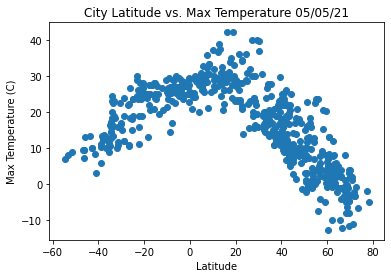

In [12]:
# Call the cate
date = dt.datetime.today().strftime('%d/%m/%y')

# Plot temperature
plt.scatter(clean_city_df['Latitude'], city_data_df['Temperature'])
plt.title(f'City Latitude vs. Max Temperature {date}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.savefig('lat_temp.png')

## Latitude vs. Humidity Plot

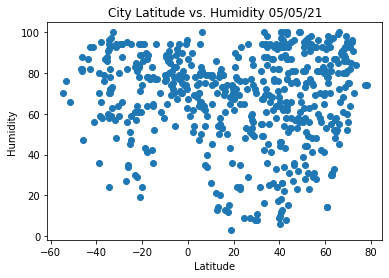

In [13]:
# Plot humidity
plt.scatter(clean_city_df['Latitude'], city_data_df['Humidity'])
plt.title(f'City Latitude vs. Humidity {date}')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('lat_humidity.png')

## Latitude vs. Cloudiness Plot

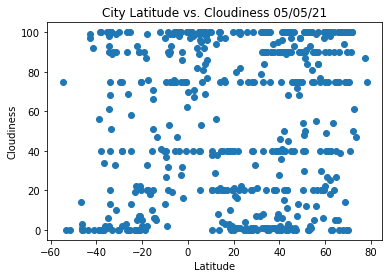

In [14]:
# Plot cloudiness
plt.scatter(clean_city_df['Latitude'], city_data_df['Cloudiness'])
plt.title(f'City Latitude vs. Cloudiness {date}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('lat_cloudiness.png')

## Latitude vs. Wind Speed Plot

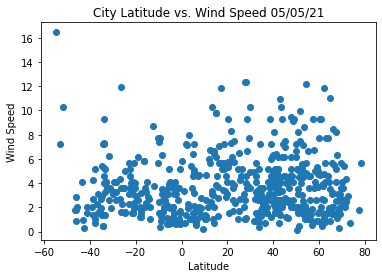

In [15]:
# Plot wind speed
plt.scatter(clean_city_df['Latitude'], city_data_df['Wind Speed'])
plt.title(f'City Latitude vs. Wind Speed {date}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('lat_wind_speed.png')

## Linear Regression

In [16]:
# Northern and Southern hemisphere dataframes
north_hem = clean_city_df.loc[clean_city_df['Latitude'] >= 0]
south_hem = clean_city_df.loc[clean_city_df['Latitude'] < 0]

#north_hem.head()
#south_hem.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.860391579384764


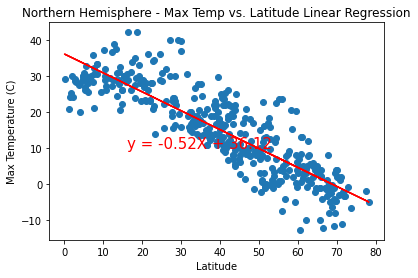

In [17]:
x_values = pd.to_numeric(north_hem['Latitude']).astype(float)
y_values = pd.to_numeric(north_hem['Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'X + ' + str(round(intercept, 2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated rvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The r-value is: {rvalue}")

plt.savefig('north_hem_temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8046379217237624


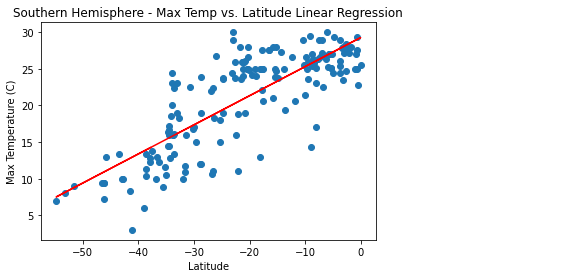

In [18]:
x_values = pd.to_numeric(south_hem['Latitude']).astype(float)
y_values = pd.to_numeric(south_hem['Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'X + ' + str(round(intercept, 2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated rvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The r-value is: {rvalue}")

plt.savefig('south_hem_temp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.16914964437667376


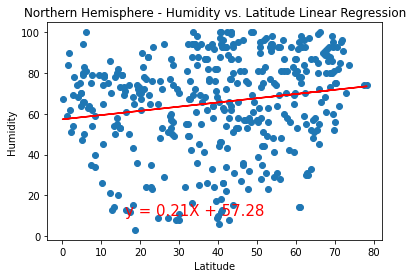

In [19]:
x_values = pd.to_numeric(north_hem['Latitude']).astype(float)
y_values = pd.to_numeric(north_hem['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'X + ' + str(round(intercept, 2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')

# Calculated rvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The r-value is: {rvalue}")

plt.savefig('north_hem_humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.09676948797455993


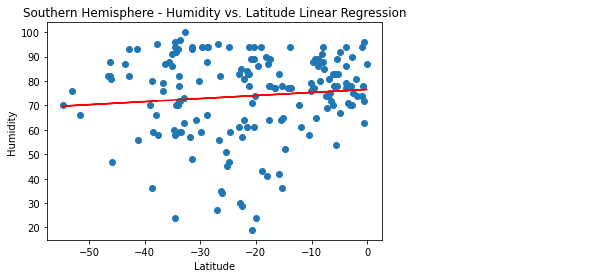

In [20]:
x_values = pd.to_numeric(south_hem['Latitude']).astype(float)
y_values = pd.to_numeric(south_hem['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'X + ' + str(round(intercept, 2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')

# Calculated rvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The r-value is: {rvalue}")

plt.savefig('south_hem_humidity.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10791483233137691


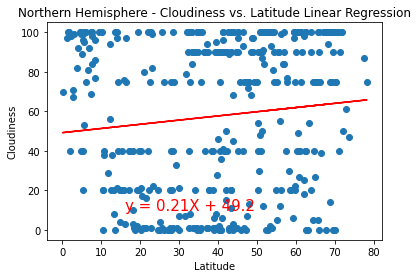

In [21]:
x_values = pd.to_numeric(north_hem['Latitude']).astype(float)
y_values = pd.to_numeric(north_hem['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'X + ' + str(round(intercept, 2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Calculated rvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The r-value is: {rvalue}")

plt.savefig('north_hem_cloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.270882744183377


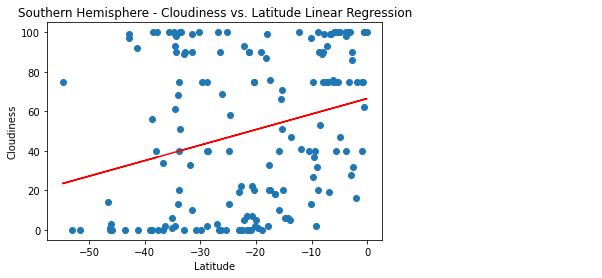

In [22]:
x_values = pd.to_numeric(south_hem['Latitude']).astype(float)
y_values = pd.to_numeric(south_hem['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'X + ' + str(round(intercept, 2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Calculated rvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The r-value is: {rvalue}")

plt.savefig('south_hem_cloudiness.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.02538205987921124


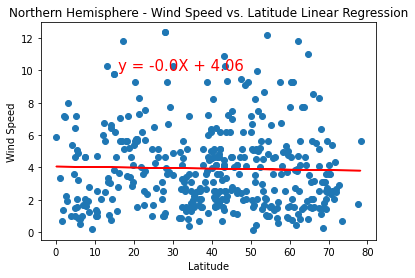

In [23]:
x_values = pd.to_numeric(north_hem['Latitude']).astype(float)
y_values = pd.to_numeric(north_hem['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'X + ' + str(round(intercept, 2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')

# Calculated rvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The r-value is: {rvalue}")

plt.savefig('north_hem_wind_speed.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.22332972527163394


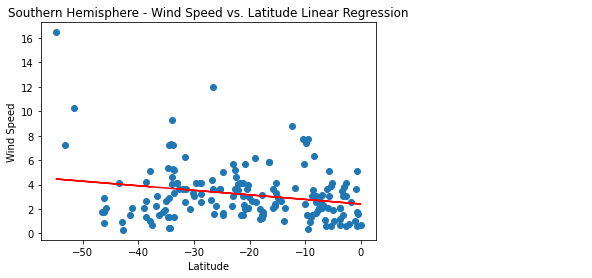

In [24]:
x_values = pd.to_numeric(south_hem['Latitude']).astype(float)
y_values = pd.to_numeric(south_hem['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'X + ' + str(round(intercept, 2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')

# Calculated rvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The r-value is: {rvalue}")

plt.savefig('south_hem_wind_speed.png')